# **Football Match Predictive Model**

### **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import itertools
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from prettytable import PrettyTable


warnings.filterwarnings('ignore')
%matplotlib inline


### **Load Football Match English Premier League Dataset**

In [ ]:
football_dataset = pd.read_csv('/content/final_dataset.csv', index_col = 0)
football_dataset

Date     HomeTeam       AwayTeam  ...      ATGD   DiffPts DiffFormPts
0     19/08/00     Charlton       Man City  ...  0.000000  0.000000    0.000000
1     19/08/00      Chelsea       West Ham  ...  0.000000  0.000000    0.000000
2     19/08/00     Coventry  Middlesbrough  ...  0.000000  0.000000    0.000000
3     19/08/00        Derby    Southampton  ...  0.000000  0.000000    0.000000
4     19/08/00        Leeds        Everton  ...  0.000000  0.000000    0.000000
...        ...          ...            ...  ...       ...       ...         ...
6835  13/05/18    Newcastle        Chelsea  ...  0.710526 -0.763158   -0.263158
6836  13/05/18  Southampton       Man City  ...  2.052632 -1.605263   -0.131579
6837  13/05/18      Swansea          Stoke  ... -0.894737  0.078947   -0.052632
6838  13/05/18    Tottenham      Leicester  ... -0.078947  0.710526    0.078947
6839  13/05/18     West Ham        Everton  ... -0.315789 -0.263158   -0.105263

[6840 rows x 39 columns]

### **Dataset Statistics**

In [ ]:
football_dataset.describe()

FTHG         FTAG  ...      DiffPts  DiffFormPts
count  6840.000000  6840.000000  ...  6840.000000  6840.000000
mean      1.527485     1.130263  ...    -0.017755    -0.018086
std       1.297913     1.124566  ...     0.668523     0.408488
min       0.000000     0.000000  ...    -2.363636    -2.250000
25%       1.000000     0.000000  ...    -0.451613    -0.176471
50%       1.000000     1.000000  ...     0.000000     0.000000
75%       2.000000     2.000000  ...     0.428571     0.153846
max       9.000000     7.000000  ...     2.285714     2.250000

[8 rows x 23 columns]

### **Find Null Values**

In [ ]:
football_dataset.isna().sum()

Date             0
HomeTeam         0
AwayTeam         0
FTHG             0
FTAG             0
FTR              0
HTGS             0
ATGS             0
HTGC             0
ATGC             0
HTP              0
ATP              0
HM1              0
HM2              0
HM3              0
HM4              0
HM5              0
AM1              0
AM2              0
AM3              0
AM4              0
AM5              0
MW               0
HTFormPtsStr     0
ATFormPtsStr     0
HTFormPts        0
ATFormPts        0
HTWinStreak3     0
HTWinStreak5     0
HTLossStreak3    0
HTLossStreak5    0
ATWinStreak3     0
ATWinStreak5     0
ATLossStreak3    0
ATLossStreak5    0
HTGD             0
ATGD             0
DiffPts          0
DiffFormPts      0
dtype: int64

### **List All Attributes in the Dataset**

In [ ]:
football_dataset.keys()

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr', 'ATFormPtsStr',
       'HTFormPts', 'ATFormPts', 'HTWinStreak3', 'HTWinStreak5',
       'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5',
       'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD', 'DiffPts',
       'DiffFormPts'],
      dtype='object')

##  **Data Visualization**

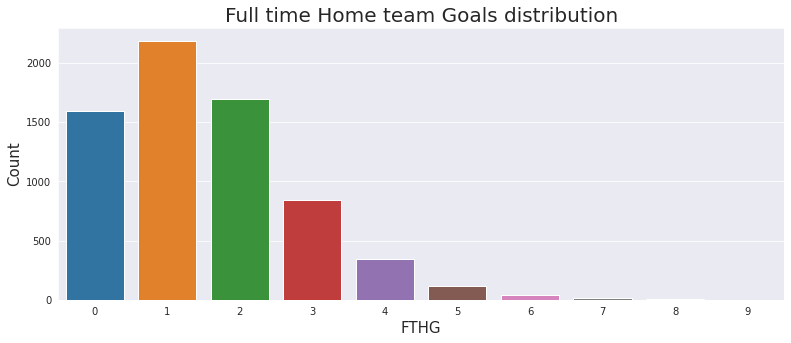

In [ ]:
#Full time Home team Goals Distribution
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize = (13,5))
sns.countplot(football_dataset['FTHG'])
plt.title("Full time Home team Goals distribution", fontsize = 20)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('FTHG', fontsize = 15)
plt.show()

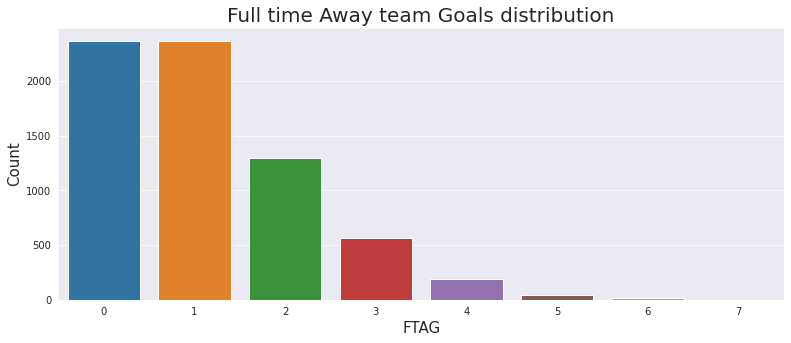

In [ ]:
#Full time Away Team Goal Distribution
plt.figure(figsize = (13,5))
sns.countplot(football_dataset['FTAG'])
plt.title("Full time Away team Goals distribution", fontsize = 20)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('FTAG', fontsize = 15)
plt.show()

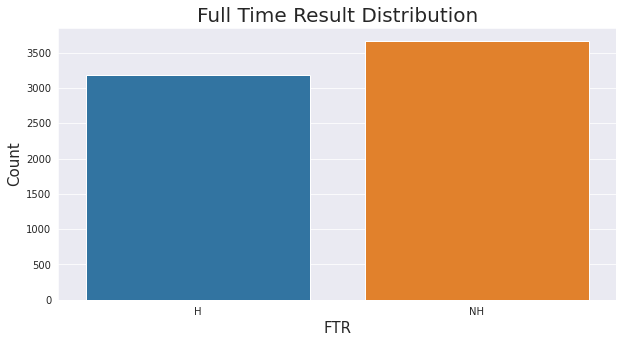

In [ ]:
#Full time result completion
plt.figure(figsize = (10,5))
sns.countplot(football_dataset['FTR'])
plt.title("Full Time Result Distribution", fontsize = 20)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('FTR', fontsize = 15)
plt.show()

In [ ]:
#converting the datatype of date column from object to datetime
football_dataset['Date'] = pd.to_datetime(football_dataset['Date'])

In [ ]:
#Creating new column yYear from Date Column
football_dataset['Year'] = football_dataset['Date'].dt.year

In [ ]:
#Creating new dataframe for getting statistics for each year
ftr_year = pd.DataFrame(football_dataset.groupby('Year')['FTR'].value_counts()).rename(columns = {'FTR':'count'}).reset_index()

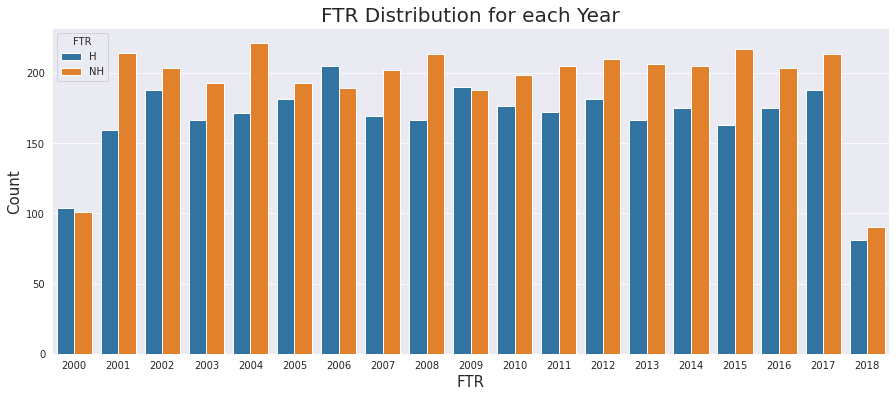

In [ ]:
#plotting FTR Distribution for each Year
plt.figure(figsize = (15,6))
sns.barplot(data = ftr_year,x = 'Year',y = 'count', hue = 'FTR')
plt.title("FTR Distribution for each Year", fontsize = 20)
plt.xlabel("FTR", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

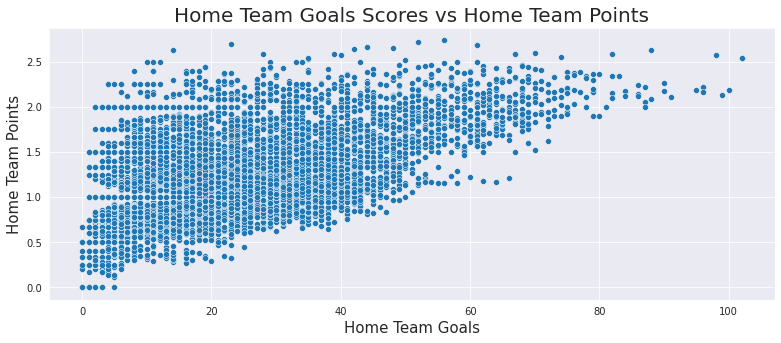

In [ ]:
#Home Team Goals Score vs Home Team points
plt.figure(figsize = (13,5))
sns.scatterplot(data= football_dataset, x = 'HTGS', y = 'HTP')
plt.title('Home Team Goals Scores vs Home Team Points', fontsize = 20)
plt.xlabel('Home Team Goals', fontsize = 15)
plt.ylabel('Home Team Points', fontsize = 15)
plt.show()

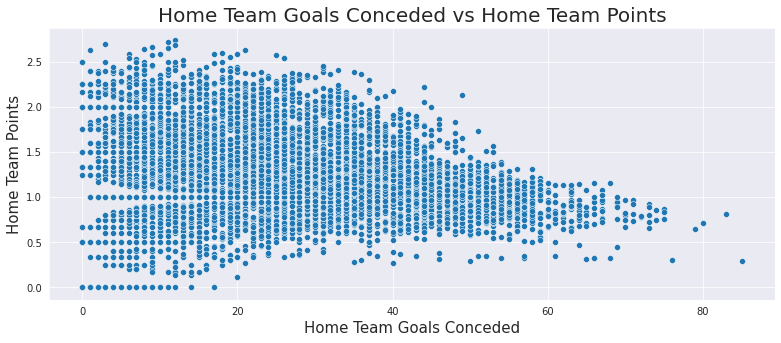

In [ ]:
#Home Team Goals Conceded vs Home Team points
plt.figure(figsize = (13,5))
sns.scatterplot(data= football_dataset, x = 'HTGC', y = 'HTP')
plt.title('Home Team Goals Conceded vs Home Team Points', fontsize = 20)
plt.xlabel('Home Team Goals Conceded', fontsize = 15)
plt.ylabel('Home Team Points', fontsize = 15)
plt.show()

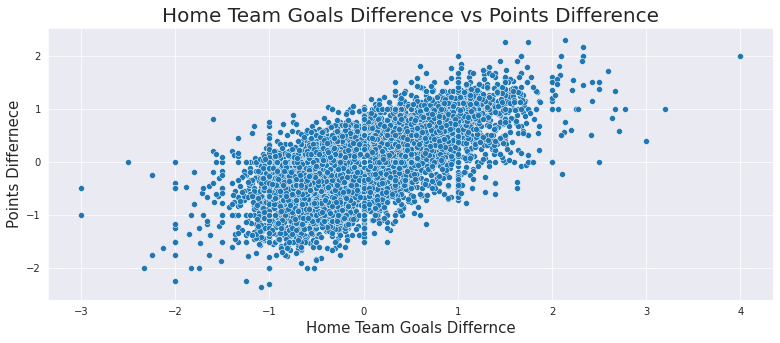

In [ ]:
#Home Team Goals Difference vs Points Difference
plt.figure(figsize = (13,5))
sns.scatterplot(data= football_dataset, x = 'HTGD', y = 'DiffPts')
plt.title('Home Team Goals Difference vs Points Difference', fontsize = 20)
plt.xlabel('Home Team Goals Differnce', fontsize = 15)
plt.ylabel('Points Differnece', fontsize = 15)
plt.show()

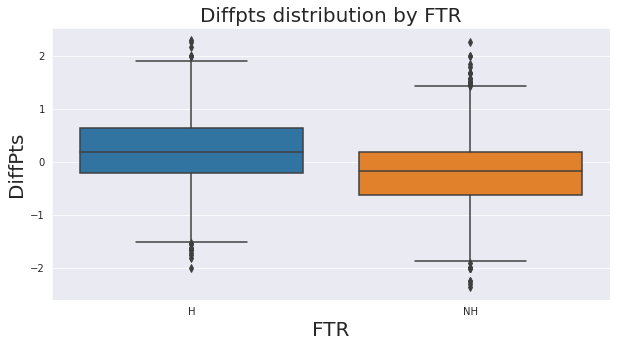

In [ ]:
#Diffpts distribution by FTR
plt.figure(figsize = (10,5))
sns.boxplot(data = football_dataset, x = 'FTR', y ='DiffPts')
plt.title('Diffpts distribution by FTR', fontsize = 20)
plt.xlabel('FTR', fontsize = 20)
plt.ylabel('DiffPts', fontsize = 20)
plt.show()

## **Plot Correlation between all Attributes**

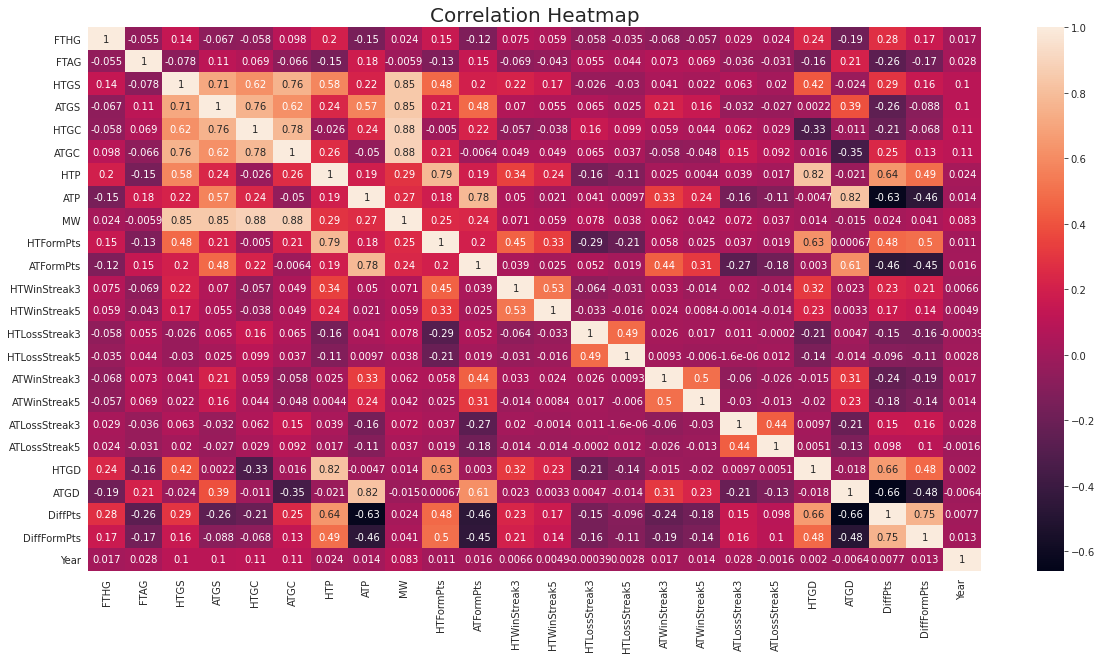

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(football_dataset.corr(), annot= True)
plt.title('Correlation Heatmap', fontsize = 20)
plt.show()

### **Drop Attributes that are Redundant and Highly Correlated**

In [ ]:
football_dataset['HM4'].unique()

array(['M', 'L', 'D', 'W'], dtype=object)

In [ ]:
football_dataset_preprocessed = football_dataset.copy().drop(columns =['Date', 'HomeTeam','AwayTeam',
'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr','ATFormPtsStr'])

### **Dataset after Pre-processing**

In [ ]:
football_dataset_preprocessed

FTHG  FTAG FTR  HTGS  ...      ATGD   DiffPts  DiffFormPts  Year
0        4     0   H     0  ...  0.000000  0.000000     0.000000  2000
1        4     2   H     0  ...  0.000000  0.000000     0.000000  2000
2        1     3  NH     0  ...  0.000000  0.000000     0.000000  2000
3        2     2  NH     0  ...  0.000000  0.000000     0.000000  2000
4        2     0   H     0  ...  0.000000  0.000000     0.000000  2000
...    ...   ...  ..   ...  ...       ...       ...          ...   ...
6835     3     0   H    36  ...  0.710526 -0.763158    -0.263158  2018
6836     0     1  NH    37  ...  2.052632 -1.605263    -0.131579  2018
6837     1     2  NH    27  ... -0.894737  0.078947    -0.052632  2018
6838     5     4   H    69  ... -0.078947  0.710526     0.078947  2018
6839     3     1   H    45  ... -0.315789 -0.263158    -0.105263  2018

[6840 rows x 30 columns]

### **Number of Features after Pre-processing**

In [ ]:
n_matches = football_dataset_preprocessed.shape[0]
n_features = football_dataset_preprocessed.shape[1] - 1


n_homewins = len(football_dataset_preprocessed[football_dataset_preprocessed.FTR == 'H'])
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))
print( "Number of matches won by home team: {}".format(n_homewins))


Total number of matches: 6840
Number of features: 29
Number of matches won by home team: 3176


### **Separate Input Features and Output Attribute**

In [ ]:
X = football_dataset_preprocessed.drop(['FTR'],1)
y = football_dataset_preprocessed['FTR']

cols = [['HTGD','ATGD','HTP','ATP']]
for col in cols:
    X[col] = scale(X[col])

### **Plot Ratio between Home Team Win or Lose**

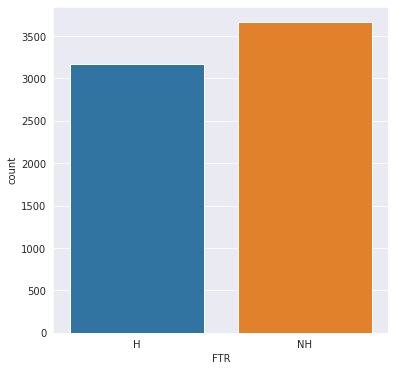

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x='FTR', data=football_dataset_preprocessed)

### **Label Encode Input Features**

In [ ]:
X.HM1 = X.HM1.astype('str')
X.HM2 = X.HM2.astype('str')
X.HM3 = X.HM3.astype('str')
X.AM1 = X.AM1.astype('str')
X.AM2 = X.AM2.astype('str')
X.AM3 = X.AM3.astype('str')

def preprocess_features(X):

    output = pd.DataFrame(index = X.index)
    for col, col_data in X.iteritems():

        # Convert all int variables to one hot vectors
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)

        # Combine the processed columns
        output = output.join(col_data)

    return output

X = preprocess_features(X)
print ("Processed feature columns ({} total features):\n{}".format(len(X.columns), list(X.columns)))


Processed feature columns (47 total features):
['FTHG', 'FTAG', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_M', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_M', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_M', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_M', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_M', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_M', 'AM3_W', 'HTFormPts', 'ATFormPts', 'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts', 'Year']


### **Label Encode Output Attribute**

In [ ]:
football_dataset_preprocessed["FTR"] = football_dataset_preprocessed["FTR"].apply(lambda x: 0 if x=='NH' else 1)
y = football_dataset_preprocessed["FTR"]

### **Split Dataset into Train and Test**

In [ ]:
# split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 2,stratify = y)

### **Train and Evaluate Models**

In [ ]:
def train_evalute_model(model, model_name, X_train, X_test, y_train, y_test):
    '''Method to train and predict the test data, and calculate evalution metrices'''

    # train the model
    model.fit(X_train, y_train)


    # predict the train and test model
    #y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_train)

    # calculate the accuracy
    result = {}
    result['Model_name'] = model_name

    result['Accuracy'] = accuracy_score(y_train, y_pred_test)
    result['Precision'] = precision_score(y_train, y_pred_test)
    result['Recall'] = recall_score(y_train, y_pred_test)
    result['F1'] = f1_score(y_train, y_pred_test)
    result['Confusion Matrix'] = confusion_matrix(y_train, y_pred_test)
    print(result)


    return result

In [ ]:
results_train = []
# LR
results_train.append(train_evalute_model(LogisticRegression(random_state=0), 'LR', X_train, X_test, y_train, y_test))
# Random Forest
results_train.append(train_evalute_model(RandomForestClassifier(n_estimators=100, random_state=0), 'RF', X_train, X_test, y_train, y_test))
# MLP
results_train.append(train_evalute_model(MLPClassifier(random_state=1, max_iter=100), 'MLP', X_train, X_test, y_train, y_test))
# DT
results_train.append(train_evalute_model(DecisionTreeClassifier(random_state=0), 'DT', X_train, X_test, y_train, y_test))
# GB
results_train.append(train_evalute_model(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=82,
              silent=None, subsample=1, verbosity=1, eval_metric = 'error'), 'GB', X_train, X_test, y_train, y_test))
# KNN
results_train.append(train_evalute_model(KNeighborsClassifier(n_neighbors=3), 'KNN', X_train, X_test, y_train, y_test))
#print(results)

{'Model_name': 'LR', 'Accuracy': 0.9300073099415205, 'Precision': 0.9298804780876494, 'Recall': 0.9185360094451004, 'F1': 0.9241734310037616, 'Confusion Matrix': array([[2755,  176],
       [ 207, 2334]])}
{'Model_name': 'RF', 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1': 1.0, 'Confusion Matrix': array([[2931,    0],
       [   0, 2541]])}
{'Model_name': 'MLP', 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1': 1.0, 'Confusion Matrix': array([[2931,    0],
       [   0, 2541]])}
{'Model_name': 'DT', 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1': 1.0, 'Confusion Matrix': array([[2931,    0],
       [   0, 2541]])}
{'Model_name': 'GB', 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1': 1.0, 'Confusion Matrix': array([[2931,    0],
       [   0, 2541]])}
{'Model_name': 'KNN', 'Accuracy': 0.8369883040935673, 'Precision': 0.8323256751309955, 'Recall': 0.8126721763085399, 'F1': 0.8223815213062525, 'Confusion Matrix': array([[2515,  416],
       [ 476, 2065]])}


In [ ]:
results_train = pd.DataFrame(results_train)
results_train.to_csv('results_train.csv')
results_train

Model_name  Accuracy  ...        F1            Confusion Matrix
0         LR  0.930007  ...  0.924173  [[2755, 176], [207, 2334]]
1         RF  1.000000  ...  1.000000      [[2931, 0], [0, 2541]]
2        MLP  1.000000  ...  1.000000      [[2931, 0], [0, 2541]]
3         DT  1.000000  ...  1.000000      [[2931, 0], [0, 2541]]
4         GB  1.000000  ...  1.000000      [[2931, 0], [0, 2541]]
5        KNN  0.836988  ...  0.822382  [[2515, 416], [476, 2065]]

[6 rows x 6 columns]

In [ ]:
def train_evalute_model(model, model_name, X_train, X_test, y_train, y_test):
    '''Method to train and predict the test data, and calculate evalution metrices'''

    # train the model
    model.fit(X_train, y_train)


    # predict the train and test model
    #y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # calculate the accuracy
    result = {}
    result['Model_name'] = model_name

    result['Accuracy'] = accuracy_score(y_test, y_pred_test)
    result['Precision'] = precision_score(y_test, y_pred_test)
    result['Recall'] = recall_score(y_test, y_pred_test)
    result['F1'] = f1_score(y_test, y_pred_test)
    result['Confusion Matrix'] = confusion_matrix(y_test, y_pred_test)
    print(result)


    return result

In [ ]:
results = []
# LR
results.append(train_evalute_model(LogisticRegression(random_state=0), 'LR', X_train, X_test, y_train, y_test))
# Random Forest
results.append(train_evalute_model(RandomForestClassifier(n_estimators=100, random_state=0), 'RF', X_train, X_test, y_train, y_test))
# MLP
results.append(train_evalute_model(MLPClassifier(random_state=1, max_iter=100), 'MLP', X_train, X_test, y_train, y_test))
# DT
results.append(train_evalute_model(DecisionTreeClassifier(random_state=0), 'DT', X_train, X_test, y_train, y_test))
# GB
results.append(train_evalute_model(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=82,
              silent=None, subsample=1, verbosity=1, eval_metric = 'error'), 'GB', X_train, X_test, y_train, y_test))
# KNN
results.append(train_evalute_model(KNeighborsClassifier(n_neighbors=3), 'KNN', X_train, X_test, y_train, y_test))
#print(results)

{'Model_name': 'LR', 'Accuracy': 0.9239766081871345, 'Precision': 0.9261637239165329, 'Recall': 0.9086614173228347, 'F1': 0.917329093799682, 'Confusion Matrix': array([[687,  46],
       [ 58, 577]])}
{'Model_name': 'RF', 'Accuracy': 0.993421052631579, 'Precision': 0.9936908517350158, 'Recall': 0.9921259842519685, 'F1': 0.9929078014184397, 'Confusion Matrix': array([[729,   4],
       [  5, 630]])}
{'Model_name': 'MLP', 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1': 1.0, 'Confusion Matrix': array([[733,   0],
       [  0, 635]])}
{'Model_name': 'DT', 'Accuracy': 0.9992690058479532, 'Precision': 1.0, 'Recall': 0.9984251968503937, 'F1': 0.9992119779353822, 'Confusion Matrix': array([[733,   0],
       [  1, 634]])}
{'Model_name': 'GB', 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1': 1.0, 'Confusion Matrix': array([[733,   0],
       [  0, 635]])}
{'Model_name': 'KNN', 'Accuracy': 0.6659356725146199, 'Precision': 0.64171974522293, 'Recall': 0.6346456692913386, 'F1': 0.638

In [ ]:
results = pd.DataFrame(results)
results.to_csv('results.csv')

### **Results and Analysis**

In [ ]:
#results on training data
results_train.iloc[:,:5]

Model_name  Accuracy  Precision    Recall        F1
0         LR  0.930007   0.929880  0.918536  0.924173
1         RF  1.000000   1.000000  1.000000  1.000000
2        MLP  1.000000   1.000000  1.000000  1.000000
3         DT  1.000000   1.000000  1.000000  1.000000
4         GB  1.000000   1.000000  1.000000  1.000000
5        KNN  0.836988   0.832326  0.812672  0.822382

In [ ]:
results.iloc[:,:5]

Model_name  Accuracy  Precision    Recall        F1
0         LR  0.923977   0.926164  0.908661  0.917329
1         RF  0.993421   0.993691  0.992126  0.992908
2        MLP  1.000000   1.000000  1.000000  1.000000
3         DT  0.999269   1.000000  0.998425  0.999212
4         GB  1.000000   1.000000  1.000000  1.000000
5        KNN  0.665936   0.641720  0.634646  0.638163

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=False)
colors = ['lightslategray',] * 5
colors[4] = 'crimson'
fig = go.Figure()
fig.add_trace(go.Bar(name='Train Accuracy', x=results_train['Model_name'], y=results_train['Accuracy']))
fig.add_trace(go.Bar(name='Test Accuracy', x=results['Model_name'], y=results['Accuracy']))
fig.layout = dict(title = 'Models Accuracy Comparison',xaxis= dict(title= 'Model Name',ticklen= 2,zeroline= False))
#fig = dict(data = traces, layout = layout)
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(name='Train F1', x=results_train['Model_name'], y=results_train['F1']))
fig.add_trace(go.Bar(name='Test F1', x=results['Model_name'], y=results['F1']))
fig.layout = dict(title = 'Models F1 Score Comparison',xaxis= dict(title= 'Model Name',ticklen= 2,zeroline= False))
fig.show()

### **Plot Detailed Confusion Matrix of All Models**

In [ ]:
model0 = results.iloc[:,-1][0]
model1 = results.iloc[:,-1][1]
model2 = results.iloc[:,-1][2]
model3 = results.iloc[:,-1][3]
model4 = results.iloc[:,-1][4]
model5 = results.iloc[:,-1][5]

#### **Plot Logistic Regression Confusion Matrix**


 LR : Logistic Regression Confusion Matrix




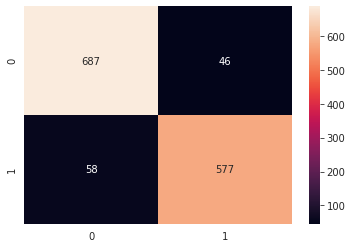

In [ ]:
print("\n",results.iloc[:,0][0],": Logistic Regression Confusion Matrix\n\n")
sns.heatmap(model0, annot=True,fmt='d')
plt.show()

#### **Plot Random Forest Confusion Matrix**


 RF : Random Forest Confusion Matrix




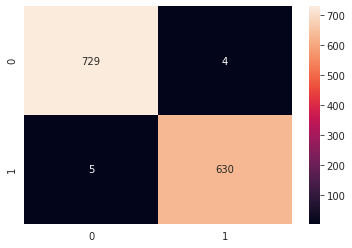

In [ ]:
print("\n",results.iloc[:,0][1],": Random Forest Confusion Matrix\n\n")
sns.heatmap(model1, annot=True,fmt='d')
plt.show()

#### **Plot Multilayer Perceptron Confusion Matrix**


 MLP : Multilayer Perceptron Confusion Matrix




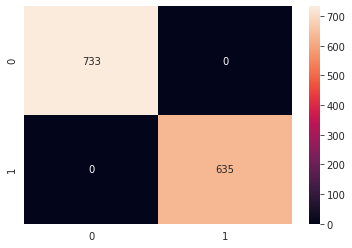

In [ ]:
print("\n",results.iloc[:,0][2],": Multilayer Perceptron Confusion Matrix\n\n")
sns.heatmap(model2, annot=True,fmt='d')
plt.show()

#### **Plot Decision Tree Confusion Matrix**


 DT : Decision Tree Confusion Matrix




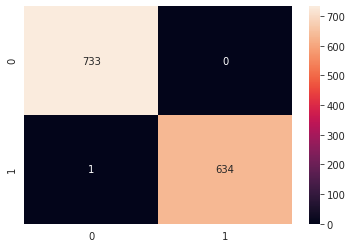

In [ ]:
print("\n",results.iloc[:,0][3],": Decision Tree Confusion Matrix\n\n")
sns.heatmap(model3, annot=True,fmt='d')
plt.show()

#### **Plot Gradient Boost Confusion Matrix**


 GB : Gradient Boost Confusion Matrix




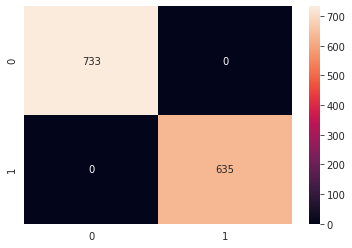

In [ ]:
print("\n",results.iloc[:,0][4],": Gradient Boost Confusion Matrix\n\n")
sns.heatmap(model4, annot=True,fmt='d')
plt.show()

#### **Plot K Nearest Neighbour Confusion Matrix**


 KNN : K Nearest Neighbour Confusion Matrix




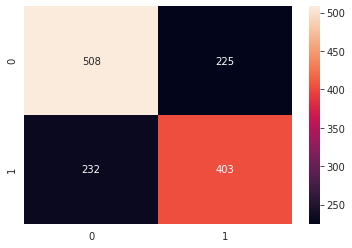

In [ ]:
print("\n",results.iloc[:,0][5],": K Nearest Neighbour Confusion Matrix\n\n")
sns.heatmap(model5, annot=True,fmt='d')
plt.show()

### **Find the Best Model**

In [ ]:
best_results = results.loc[results['Accuracy'].argmax()]
t = PrettyTable(['Best Model', 'Accuracy'])
t.add_row(["Gradient Boost", best_results[1]])
print(t)

+----------------+----------+
|   Best Model   | Accuracy |
+----------------+----------+
| Gradient Boost |   1.0    |
+----------------+----------+


### **Train Best Model on Complete Data**

In [ ]:
# train best model on complete data
GB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=82,
              silent=None, subsample=1,eval_metric = "error", verbosity=1)
GB.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=82,
              silent=None, subsample=1, verbosity=1)

### **Save Best Model as Pickle File**

In [ ]:
pickle.dump(GB, open('best_model_lr.pkl', 'wb'))